<h1 align='center'>
<span style='color: maroon'>
<b>
CLUSTERED CUSTOMER BY USING K-MEANS
</b>
</span>
</h1>

## **| Process**

1. Load data
2. Data Analysis
3. Data Preprocessing
4. Feature Engineering
5. Build and Train model
6. Visualize cluster in 2D or 3D to compare the result.
7. Measure performance of your clustering model.

<br>

<h2 align='center'>
<span style='background:black; color:OrangeRed'>
<b>
1 | Load data
</b>
</span>
</h2>
<br>

In [33]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.abspath('../'))
import utils

In [34]:
df = utils.read_dataset('Clustered_Customer_Data.csv')

The first three rows of this data frame:


,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3


Description of this dataframe:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8950.0,4474.500000,2583.786788,0.000000,2237.250000,4474.500000,6711.750000,8949.00000
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000


In [35]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [36]:
# Establish essential modules and define unified style for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

font = {
  'fontsize': 16,
  'fontstyle': 'normal',
  'backgroundcolor': 'black',
  'color': 'white'
}
color = 'Reds'

%matplotlib inline
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<h2 align='center'>
<span style='background:black; color:OrangeRed'>
<b>
2 | Data Analysis
</b>
</span>
</h2>
<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
2.1 | Data Cleaning
</b>
</span>
</h2>

We can see that in our data include the feature named 'Cluster', which is saved the ground-truth cluster of each customer. Therefore, in this notebook, it play the role is label, which is supported we check our output.

So, we save it in the variable 'label' and drop it out of our df.

In [37]:
ground_truth_label = df['Cluster']
df = df.drop(columns=['Cluster'])

In [38]:
df.shape

(8950, 17)

In [39]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
2.2 | Data Classifying
</b>
</span>
</h2>

Because the original data has been processed one hot, we are forced to split to determine numeric columns, to avoid the case of wrong scaler.

In [41]:
print(df.nunique().sort_values(ascending=False))

BALANCE                             8871
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PURCHASES                           6203
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
ONEOFF_PURCHASES                    4014
CREDIT_LIMIT                         206
PURCHASES_TRX                        173
CASH_ADVANCE_TRX                      65
CASH_ADVANCE_FREQUENCY                54
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PRC_FULL_PAYMENT                      47
PURCHASES_INSTALLMENTS_FREQUENCY      47
BALANCE_FREQUENCY                     43
TENURE                                 7
dtype: int64


> Insight: All data is numeric, so we will skip this step.

<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
2.3 | Data Visualization
</b>
</span>
</h2>

<br>

We concertrate that our feature are numeric. Now we draw histogram for all columns.

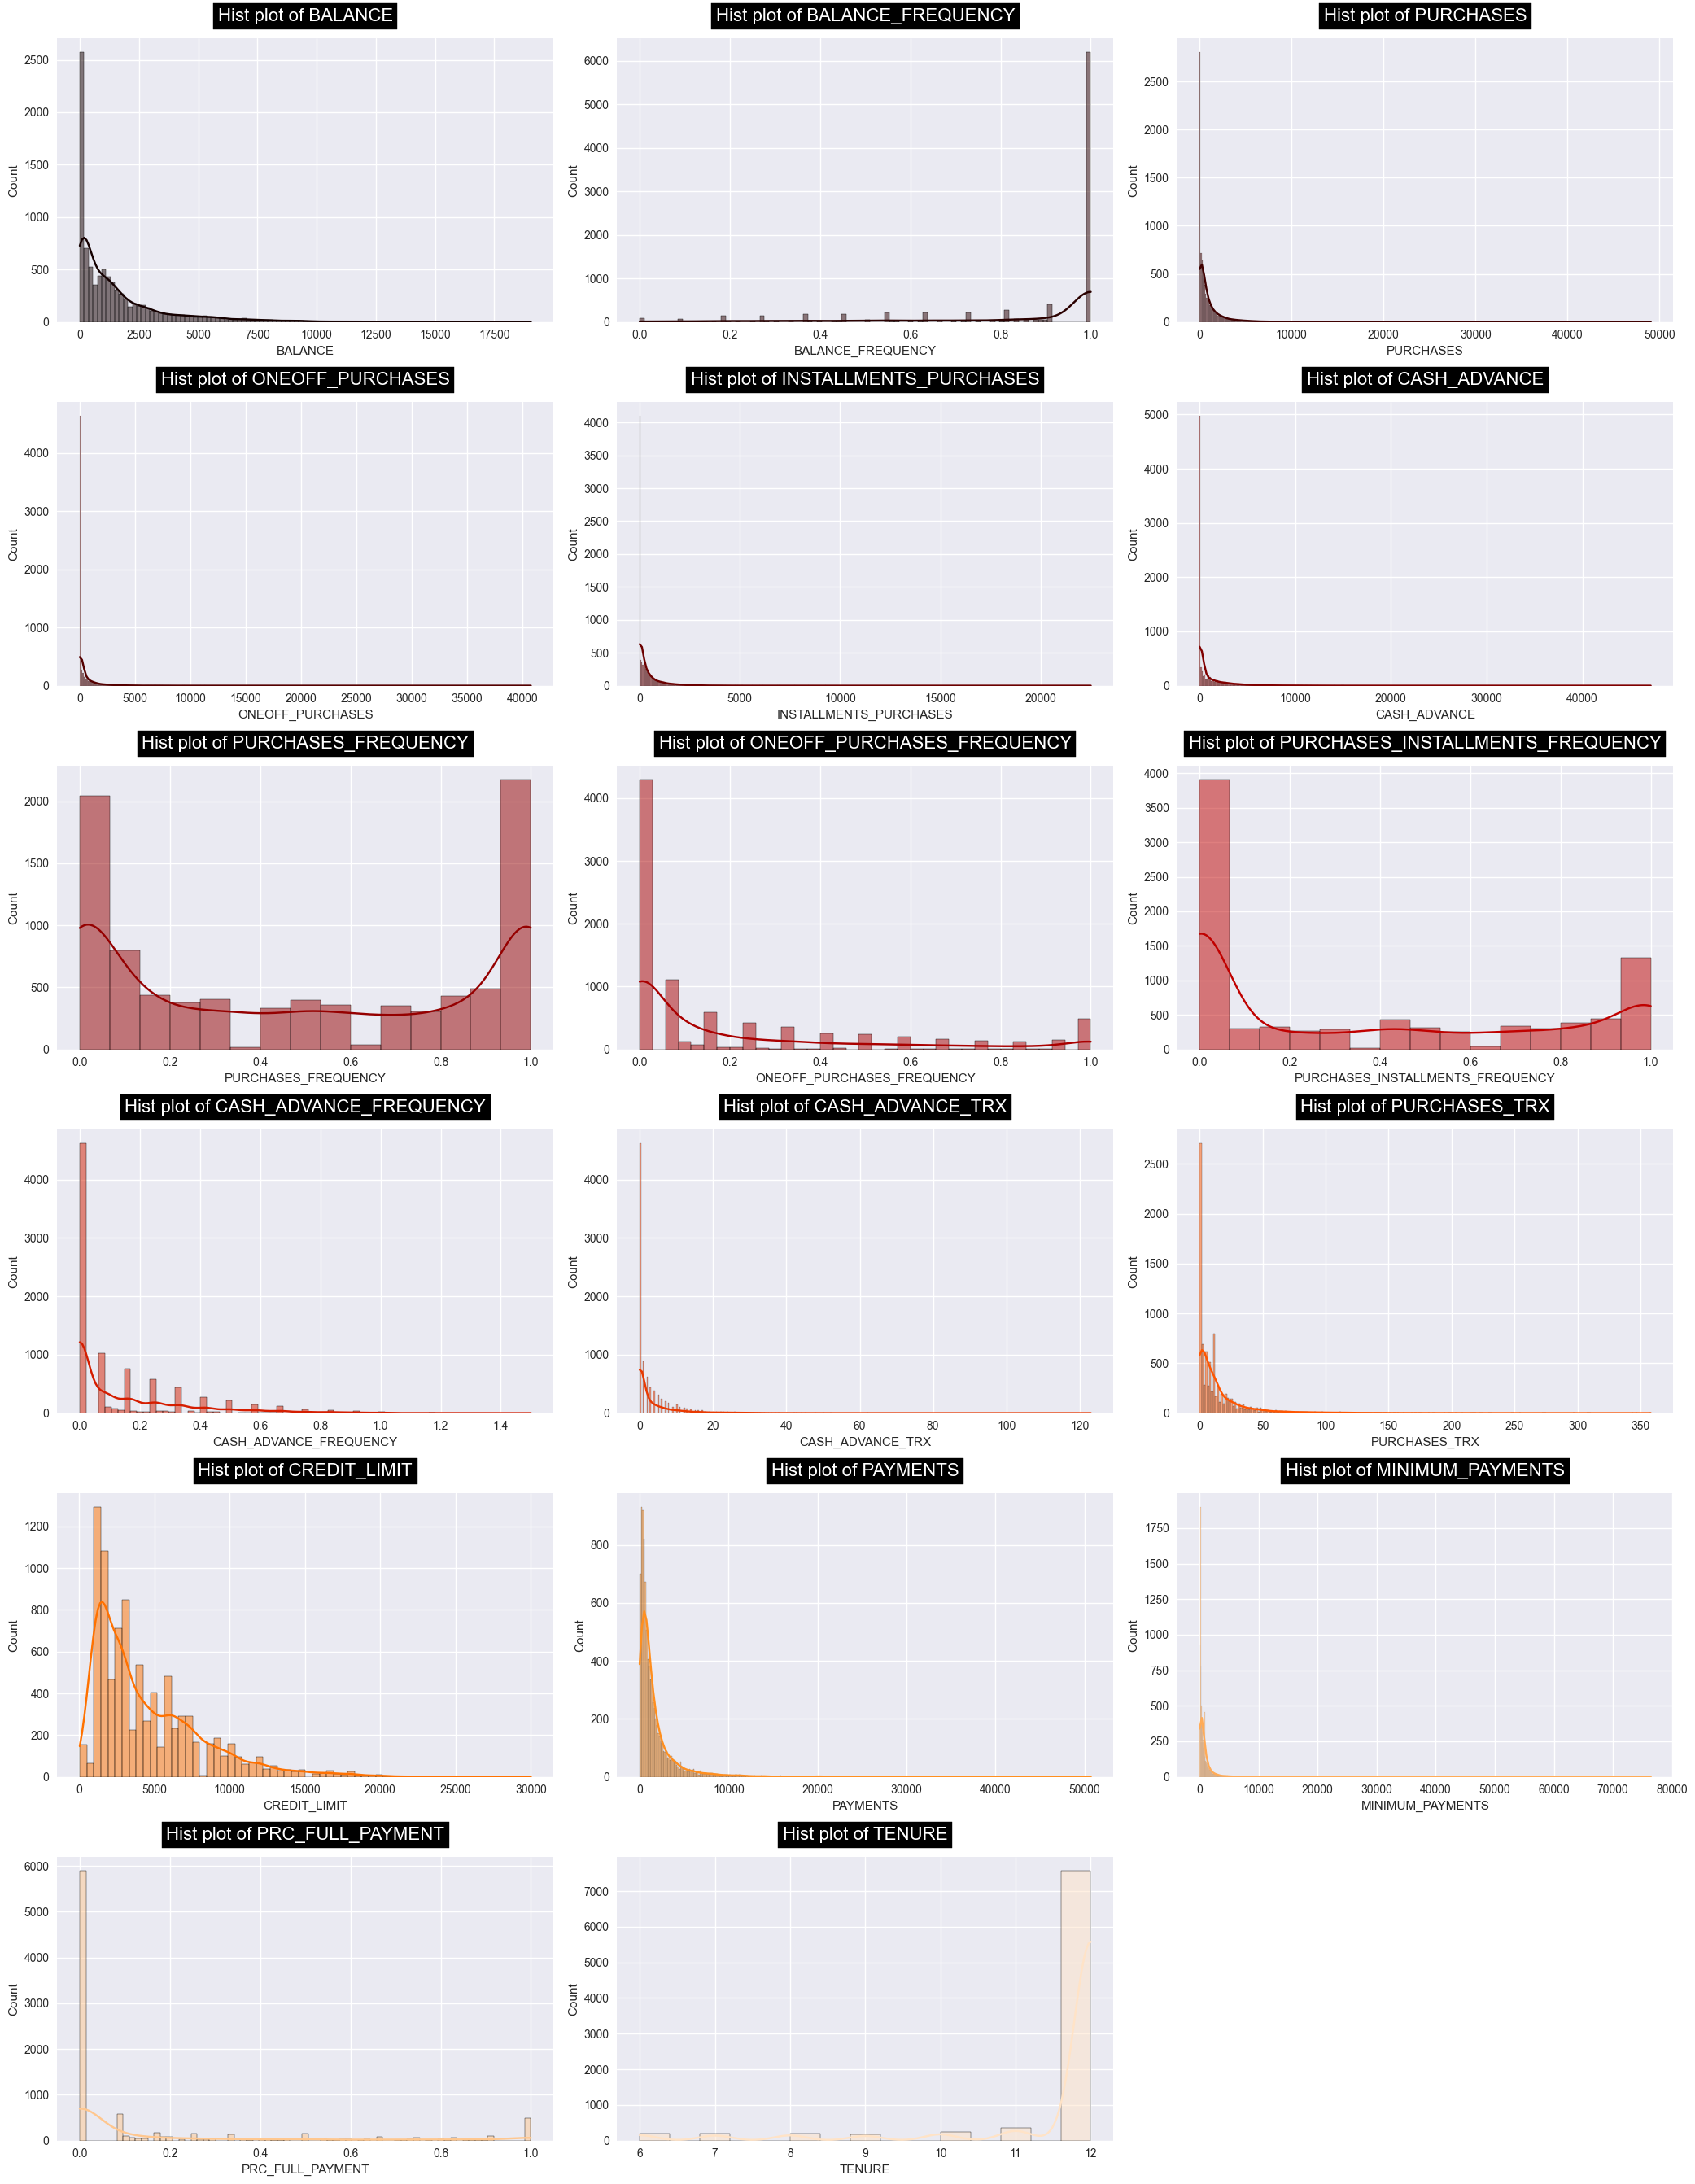

In [42]:
utils.custom_histplot(df=df, ncols=3, figsize=(21, 27), color='gist_heat')

<br>

Now let's draw box plot to detect outliers in numerical data.

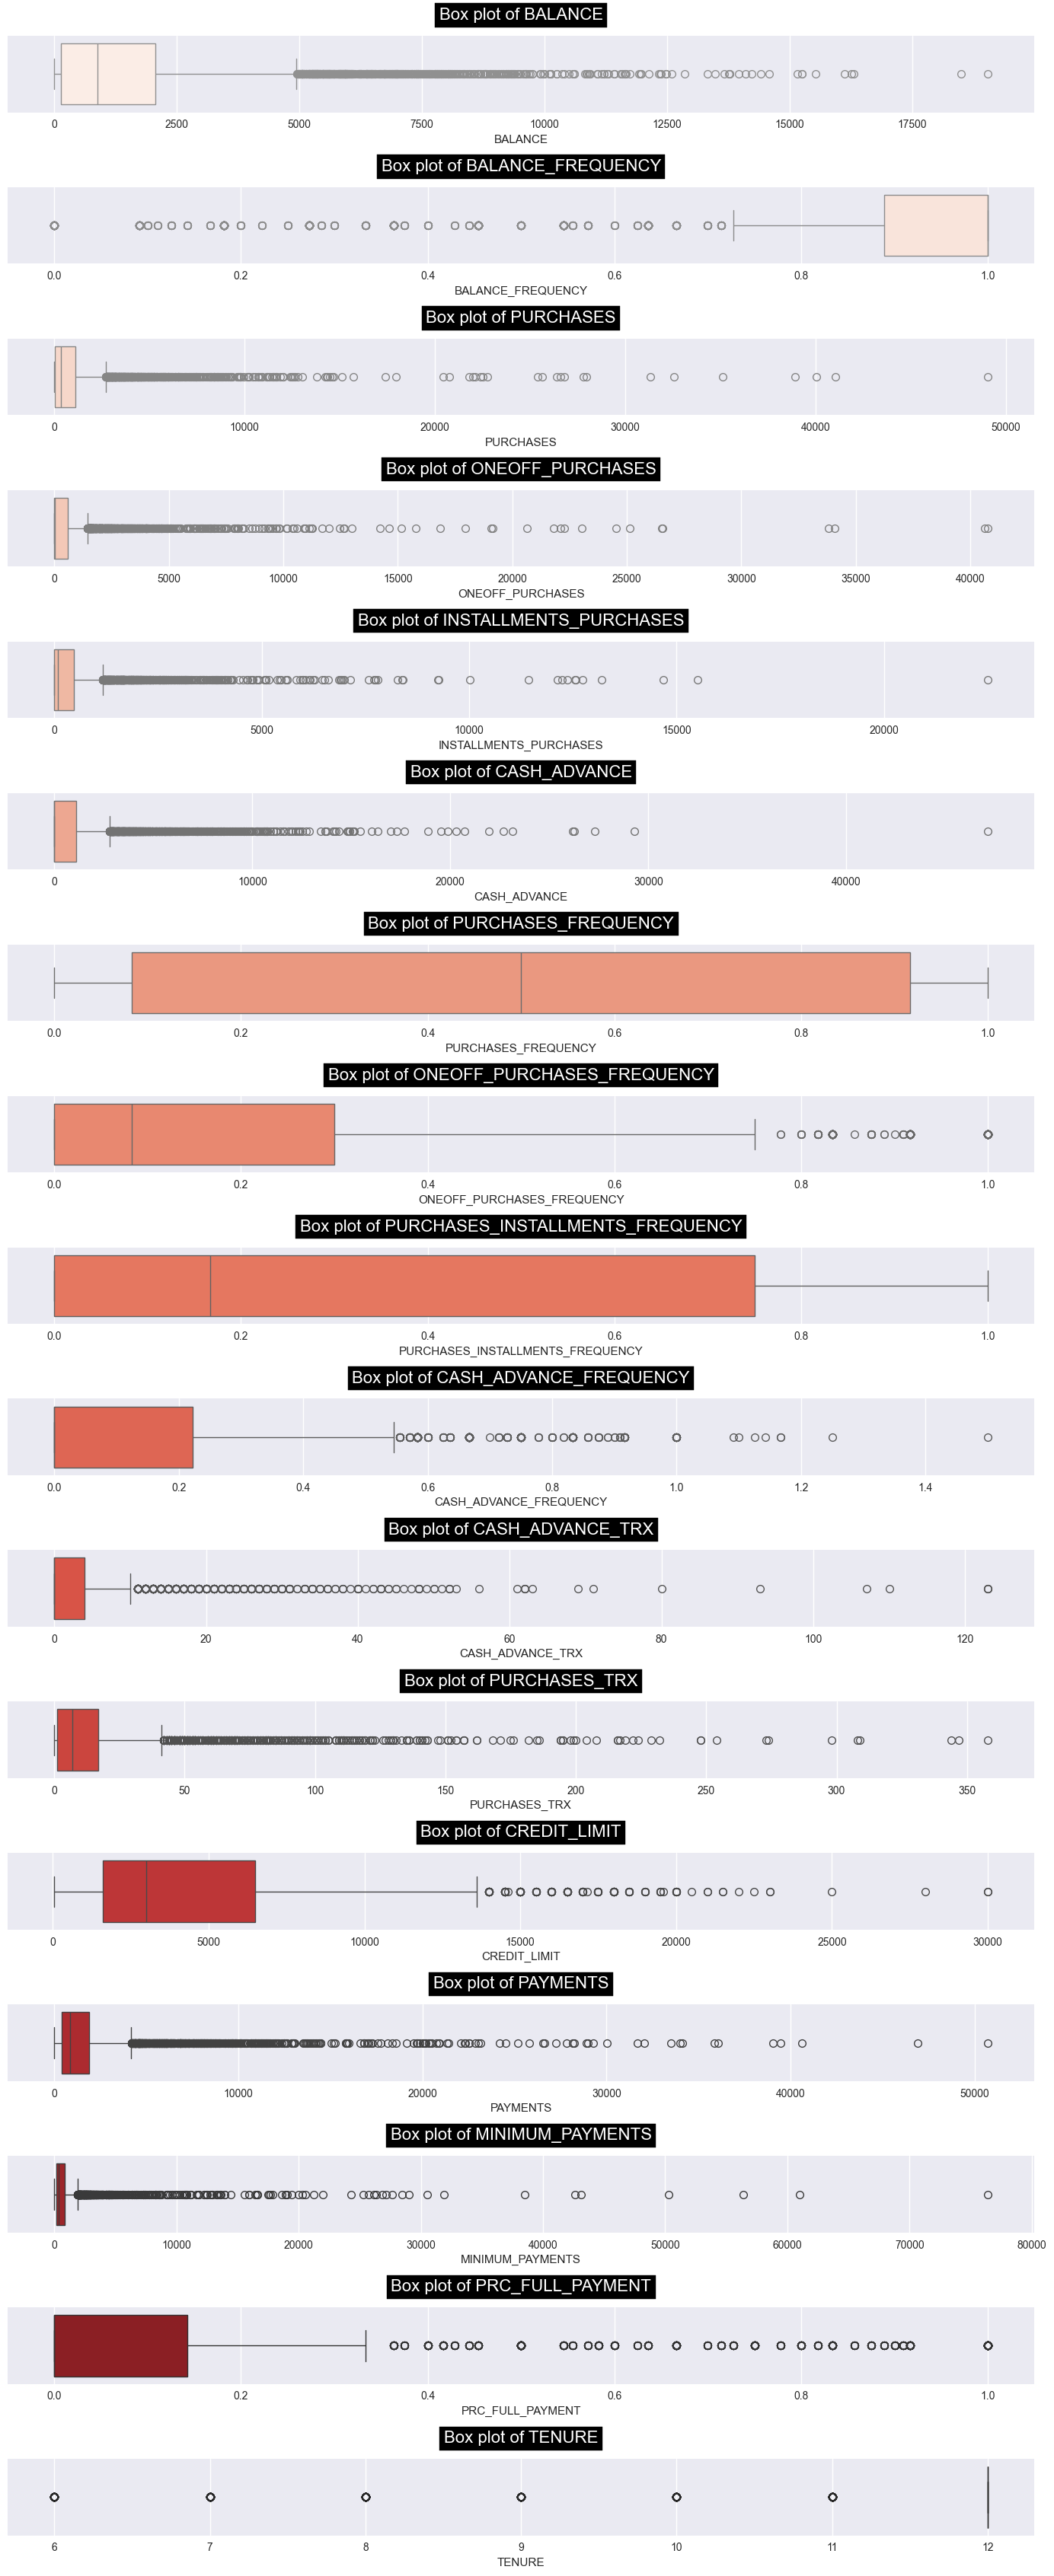

In [43]:
utils.custom_boxplot(df=df, ncols=1, color=color)

> Insight: Most data contains a lot of outliers, so if we use the mean to replace them, we will get a bad result. Therefore, we will scale the data using the StandardScaler first, and then consider to remove the outliers.

<br>

<h2 align='center'>
<span style='background:black; color:orangered'>
<b>
3 | Data Preprocessing
</b>
</span>
</h2>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
3.1 | Normalization
</b>
</span>
</h2>

<br>

Because we can see in histogram that almost has skewed distribution, so we use Log Transformation at Feature Transformation before Normalization step. 

In [44]:
from sklearn.preprocessing import StandardScaler
import math

def LogTransformation(df: pd.DataFrame) -> pd.DataFrame:
    '''
        Scaling data by using Log Transformation
    '''
    scaled_df = df.copy()
    for col in scaled_df.columns:
        for row in range(len(scaled_df[col])):
            scaled_df[col][row] = math.log(scaled_df[col][row] + 1)     
    return scaled_df

In [45]:
scaled_df = LogTransformation(df=df.copy())

Now we apply StandarSclaer() for scaled_df to scale our value to the data which the feature have the same mean and variance ($\mu = 0, \sigma^2=1$).

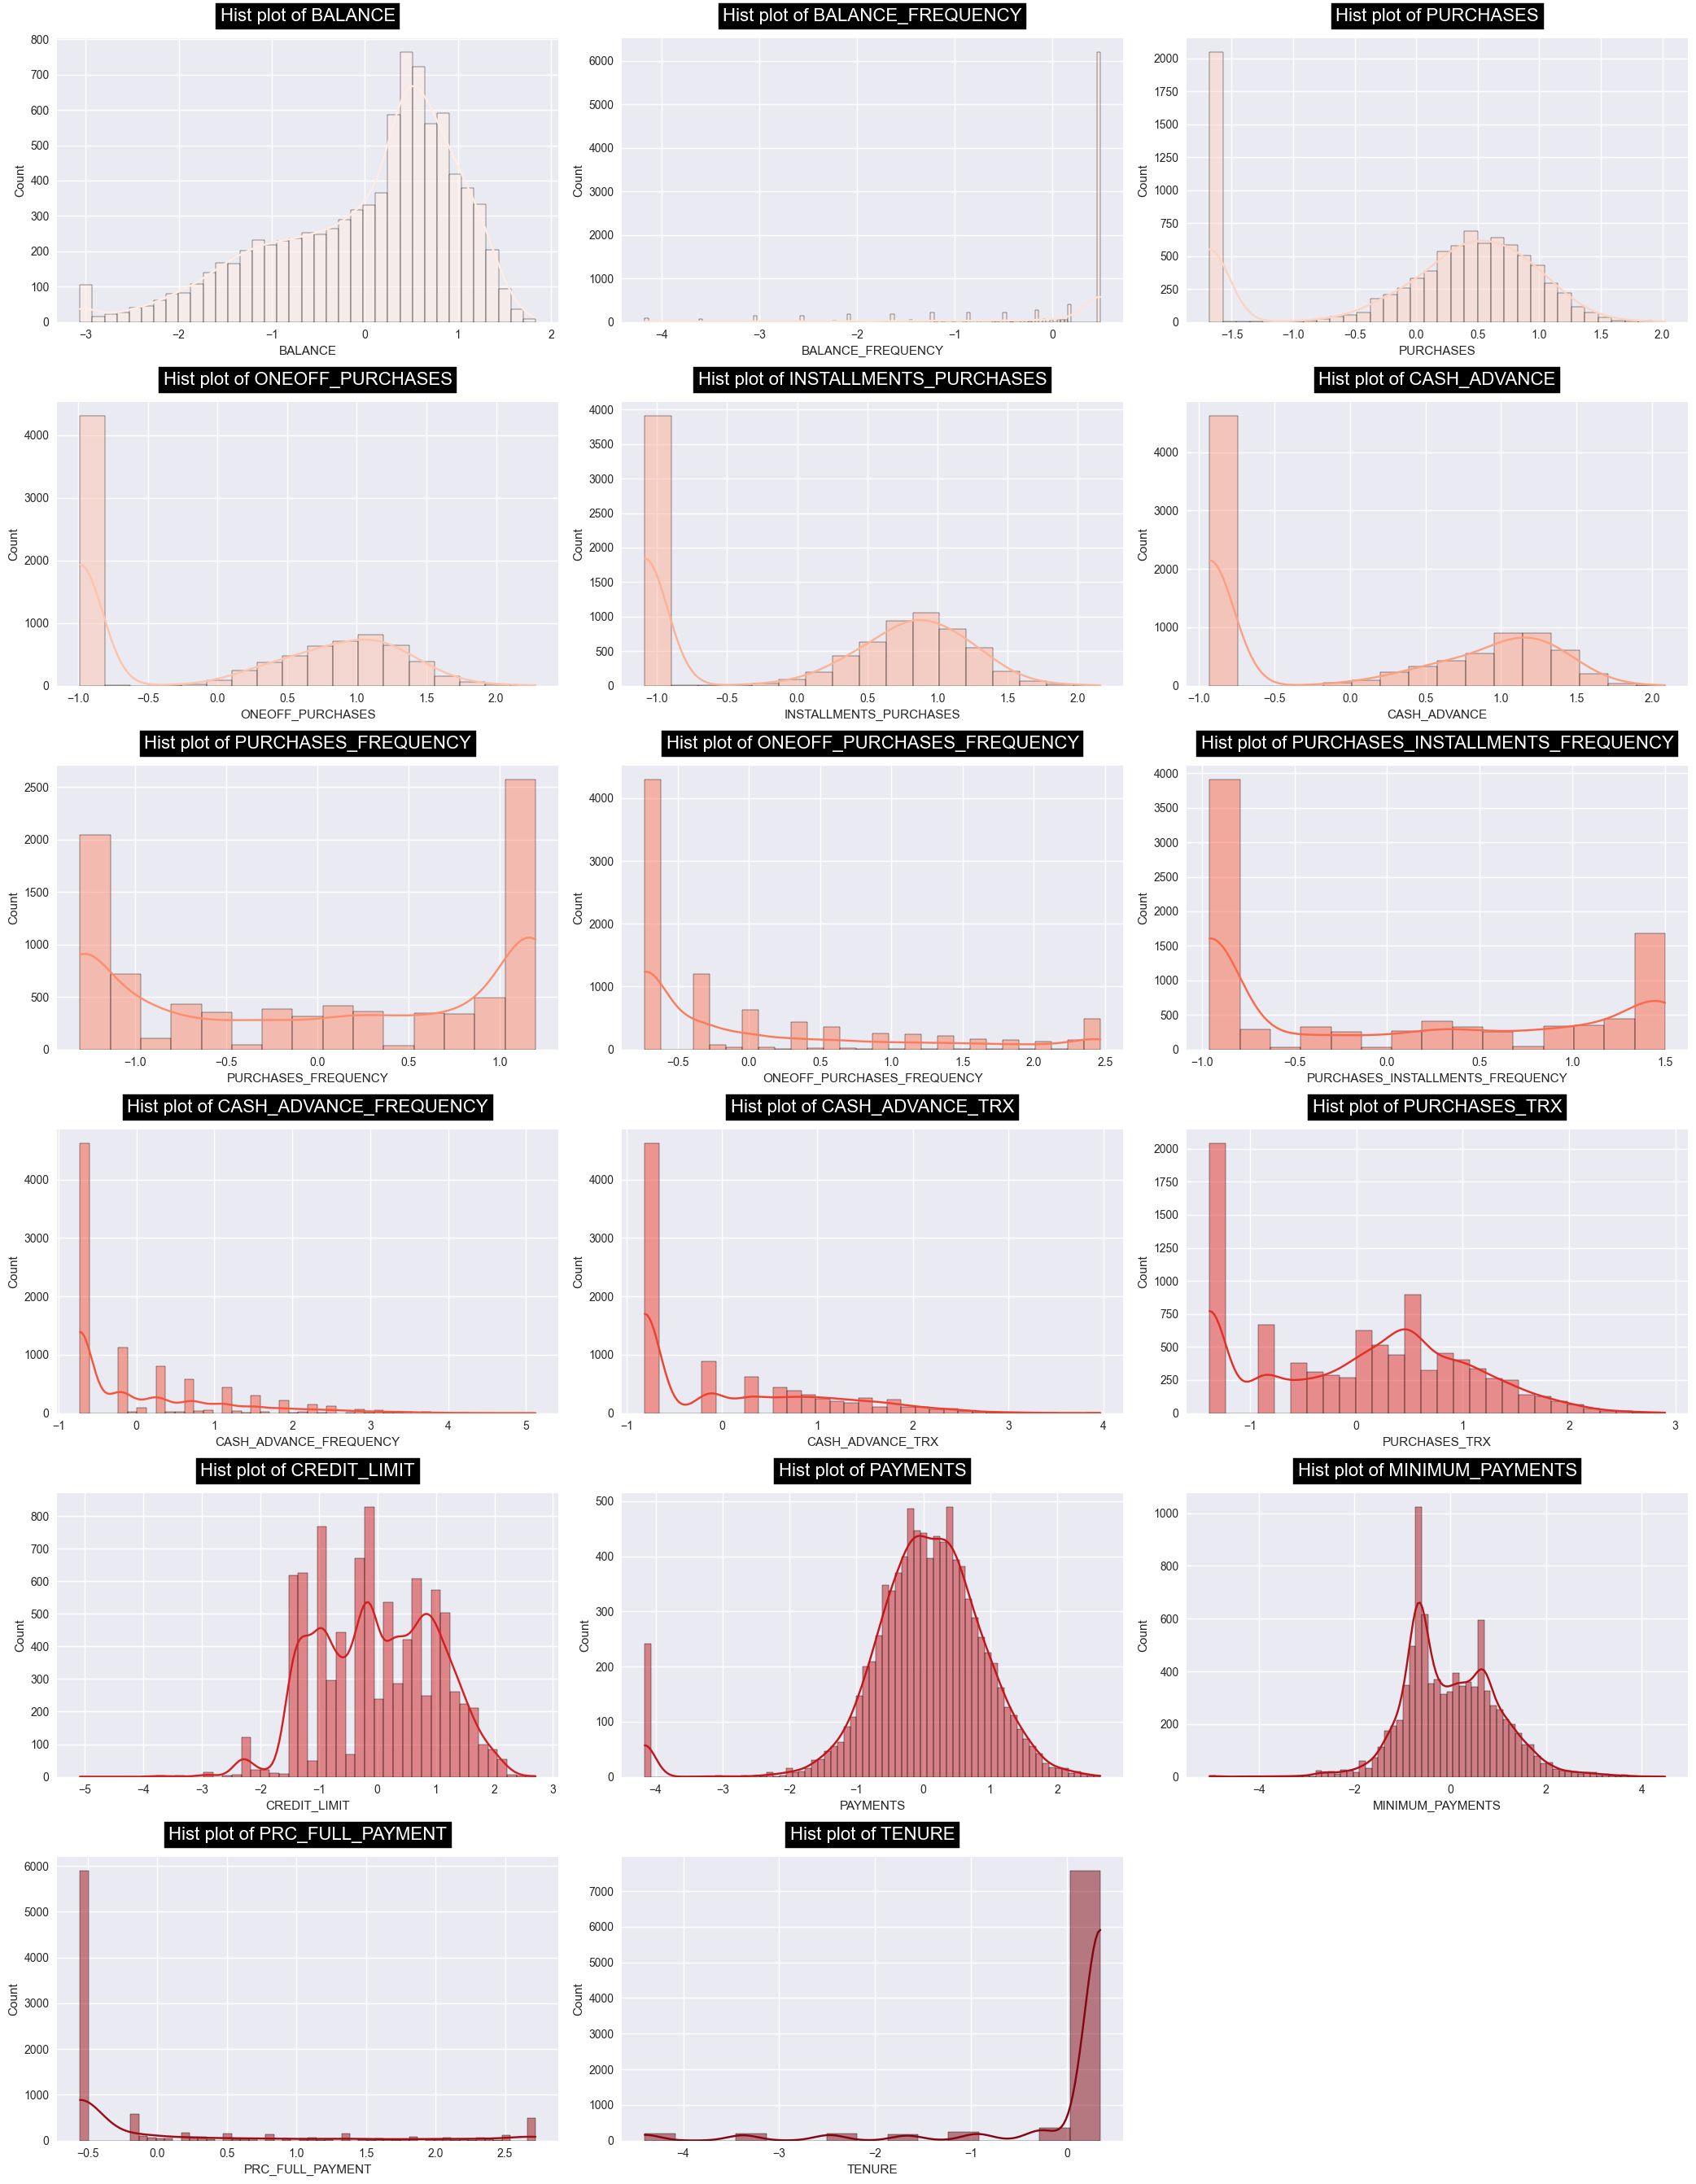

In [46]:
scaled_data = StandardScaler().fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
utils.custom_histplot(df=scaled_df, ncols=3, figsize=(21, 27), color=color)

Although the data is more clean, but we need to check for outliers again.

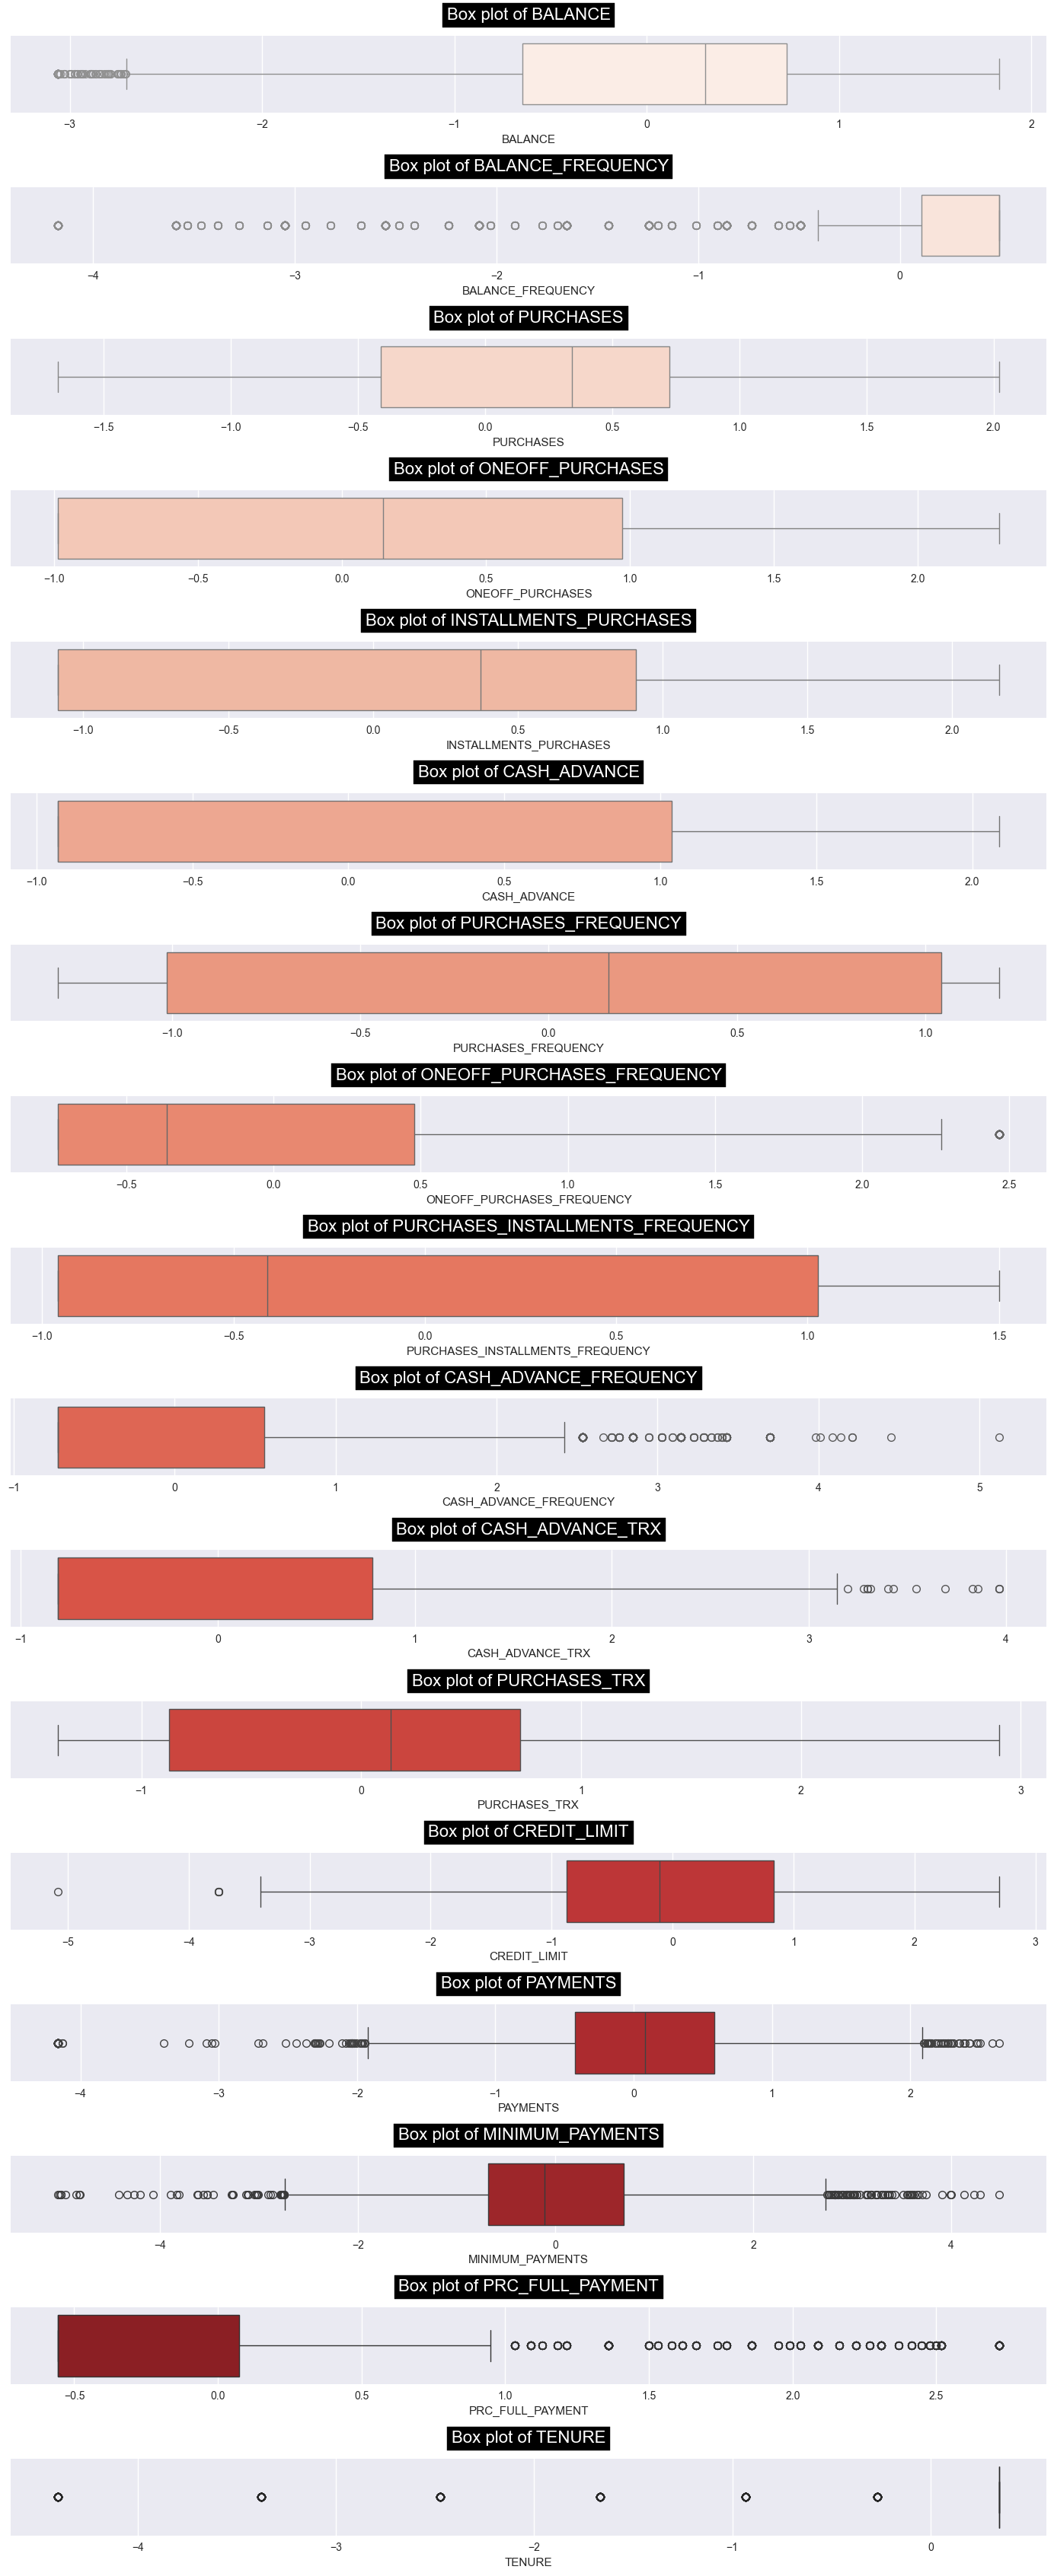

In [47]:
utils.custom_boxplot(df=scaled_df, ncols=1, color=color)

>Insight: Clearly, we still have a lot of features to work with. So, we need to remove them.

<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
3.2 | Detect Outliers
</b>
</span>
</h2>

<br>

We draw box plot to check the outliers of our dataset.

In [48]:
utils.remove_outlier_byusing_zscores(df=scaled_df)

Dataset shape Before remove outlier: (8950, 17)
Dataset shape After remove outlier: (7932, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.347262
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.347262
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.347262
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.347262
5,0.665562,0.492710,0.787360,-0.987090,1.246835,-0.930733,0.539335,-0.732480,0.672236,-0.724360,-0.810069,0.220191,-0.730576,0.389805,1.555686,-0.556368,0.347262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,-0.673163,-0.405999,0.362348,0.847838,-1.087454,0.510353,0.159385,1.138957,-0.958256,0.027252,0.563506,0.134455,-2.291713,-1.273595,-1.023372,-0.556368,-2.473577
8877,-1.059836,0.058345,0.069293,-0.987090,0.567455,-0.930733,0.964082,-0.732480,1.027349,-0.724360,-0.810069,0.134455,-1.447207,-1.552848,-1.056186,-0.556368,-2.473577
8878,0.301627,-0.405999,-1.679855,-0.987090,-1.087454,1.046719,-1.302799,-0.732480,-0.958256,0.027252,0.563506,-1.379210,-1.224955,-1.006659,-0.106510,-0.556368,-2.473577
8879,-0.610474,0.492710,0.408564,-0.987090,0.888447,-0.930733,0.715281,-0.732480,0.764402,-0.724360,-0.810069,0.037255,-1.447207,-0.934409,-0.947947,-0.556368,-2.473577


<br>

<h2 align='center'>
<span style='background:black; color:orangered'>
<b>
4 | Feature Engineering
</b>
</span>
</h2> 

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
4.1 | Dimensional Reduction PCA
</b>
</span>
</h2>

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(scaled_df.columns))
pca_result = pca.fit_transform(scaled_df)

Now we process this values:

In [50]:
np.round(pca.explained_variance_ratio_ * 100, decimals=4)

array([34.4745, 21.5993,  9.4412,  7.311 ,  6.6844,  5.2708,  4.208 ,
        3.0567,  2.7063,  1.544 ,  1.0856,  0.8191,  0.6025,  0.5369,
        0.2705,  0.2436,  0.1455])

<br>

We only keep the column has value >= `threshold=0.98`.

In [51]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
thresh = 0.98

n_components = np.argmax(explained_variance_ratio >= thresh) + 1
print(f'Number of components to explain {thresh * 100}% variance: {n_components}')

Number of components to explain 98.0% variance: 12


In [52]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_df)

fe_data = pd.DataFrame(
    reduced_data, 
    columns=[f'PC{i+1}' for i in range(n_components)]
)
fe_data.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.260016,-2.678496,-0.286500,1.041042,-0.222295,0.357280,-0.717452,0.315465,-0.281905,-0.317502,-0.228030,0.390463
1,-3.483375,0.991869,-0.036970,-0.036928,1.757557,0.281989,0.774766,-0.037614,0.406104,0.414869,0.374809,-0.124481
2,1.469742,1.278558,2.720253,0.986920,-0.669906,0.199234,0.485008,-0.647608,-0.311467,1.070714,-0.654471,-0.454859


<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
4.2 | Choose the best k
</b>
</span>
</h2>

We use **Elbow method** to choose the best `k`.

Elbow Method for Optimal k:


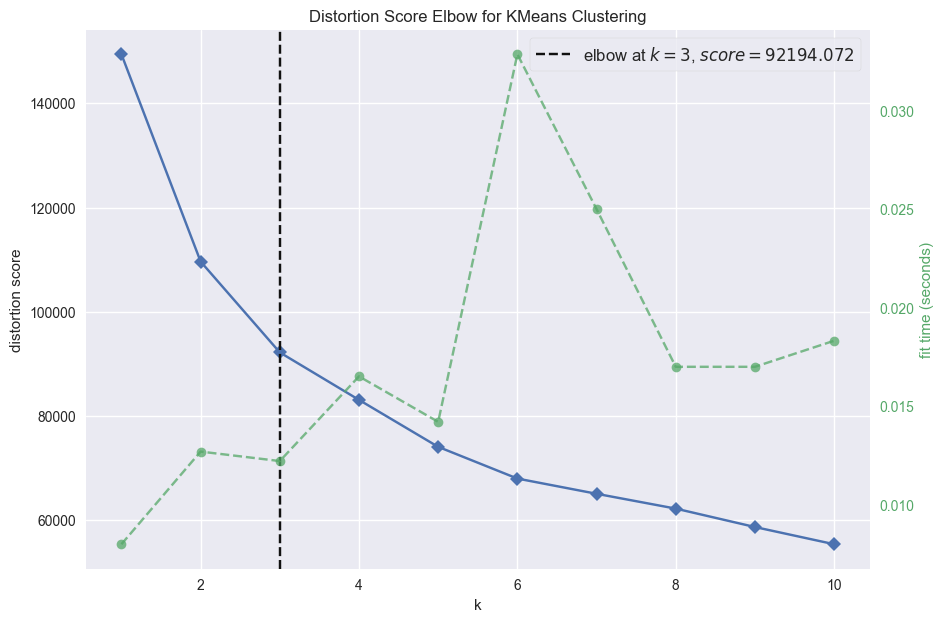

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# import setuptools

model = KMeans(random_state=42)
elbow_method = KElbowVisualizer(model, k=(1,11))
elbow_method.fit(fe_data)

print("Elbow Method for Optimal k:")
elbow_method.show()

<br>

**We choose** `k=3`.

<br>

<h2 align='center'>
<span style='background:black; color:orangered'>
<b>
5 | Build and Train model
</b>
</span>
</h2>
<br>

In [54]:
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=242).fit(fe_data)

Predict label of testing set:

In [55]:
pred = kmeans_model.predict(fe_data)
centroid = kmeans_model.cluster_centers_

In [56]:
kmeans_model.cluster_centers_.shape

(3, 12)

<br>

<h2 align='center'>
<span style='background:black; color:orangered'>
<b>
6 | Output Visualization
</b>
</span>
</h2>
<br>

In [57]:
import plotly.express as px
import plotly.graph_objects as go

label = kmeans_model.labels_

<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
6.1 | 2-Dimension
</b>
</span>
</h2>

In [58]:
pca = PCA(n_components=2)

pca_df = pd.DataFrame(
    pca.fit_transform(fe_data),
    columns=['pc1', 'pc2']
)
pca_df['Cluster'] = label

pca_df.head(3)

,pc1,pc2,Cluster
0,-0.260016,-2.678496,1
1,-3.483375,0.991869,2
2,1.469742,1.278558,0


In [59]:
centroid_pca = pca.transform(centroid)

In [60]:
fig = px.scatter(
    pca_df,
    x='pc1',
    y='pc2',
    color='Cluster',
    title='K-Means Clustering Results (2D)',
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter(
        x=centroid_pca[:, 0],
        y=centroid_pca[:, 1],
        mode='markers',
        marker=dict(size=12, color='black', symbol='x'),
        name='Centers',
    )
)
fig.update_layout(width=800, height=600)
fig.show()

<br>

<h3 align='center'>
<span style='background:PeachPuff; color:maroon'>
<b>
6.2 | 3-Dimension
</b>
</span>
</h2>

In [61]:
pca = PCA(n_components=3)

pca_df = pd.DataFrame(
    pca.fit_transform(fe_data), 
    columns=['pc1', 'pc2', 'pc3']
)
pca_df['Cluster'] = label

pca_df.head(3)

,pc1,pc2,pc3,Cluster
0,-0.260016,-2.678496,-0.286500,1
1,-3.483375,0.991869,-0.036970,2
2,1.469742,1.278558,2.720253,0


In [62]:
centroid_pca = pca.transform(centroid)

In [63]:
fig = px.scatter_3d(
    pca_df,
    x='pc1',
    y='pc2',
    z='pc3',
    color='Cluster',
    title='K-Means Clustering Results (3D)',
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter3d(
        x=centroid_pca[:, 0],
        y=centroid_pca[:, 1],
        z=centroid_pca[:, 2],
        mode='markers',
        marker=dict(size=10, color='Black', symbol='x'),
        name='Centers',
    )
)
fig.update_layout(width=800, height=600)
fig.show()